# **Titanic - Machine Learning from Disaster**

**The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). I performed EDA,DATA FILTERING,HANDELED MISSING VALUES AND FEACHER ENGINEERING to Analyze the dataset.
Dataset Link: https://www.kaggle.com/c/titanic


**what I have learnt from this project:=**

* Data Filtering
* mode()
* Drop ()
* Fillna() used to handle missing values in the Age column
* mean()
* Categorical Data encoding
* Univariate Analysis
* Bivariate Analysis
* Barplot,Boxplot,Histogram,Countplot
* Feature Engineering

In [1]:
#Importing Libraries of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
df=pd.read_csv('/content/train.csv')

### **EDA Of the Dataset**

In [4]:
# Load first 5 Rows of the Dataset.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Load Last 5 Rows of the Dataset.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Know the Size of dataset
df.shape

(891, 12)

In [7]:
# Get the all information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Get Overall Statistics About The Dataframe
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Data Filtering**

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Select two columns from dataset
df[['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [11]:
# How many male in the sex column
sum(df['Sex']=='male')

577

In [12]:
# Show me details of 5 male
df[df['Sex']=='male'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# How many people Survived on the titanic
sum(df['Survived']==1)

342

In [15]:
# Full details who survived.
df[df['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [16]:
# Check Null Values In The Dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

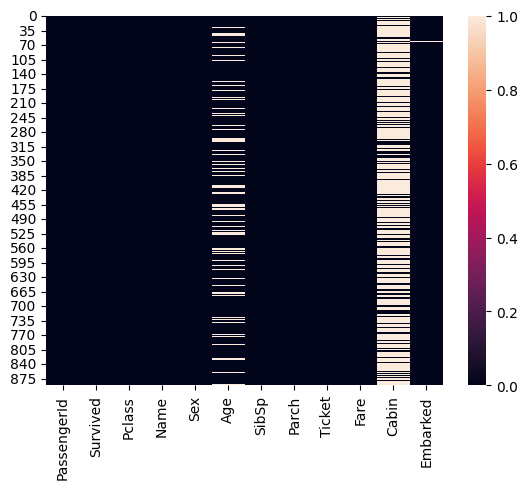

In [17]:
# Let's Plot this
sns.heatmap(df.isnull())

In [18]:
# Get the percentage of missing values
percen_missing=df.isnull().sum()*100/len(df)
percen_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
# Drop the columns
df.drop('Cabin',axis=1,inplace=True)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [21]:
# Handling missing Values
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [22]:
df['Embarked'].fillna('S',inplace=True)

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [24]:
# Fill missing values in the age column using averAge of the age
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **Categorical Data Encoding**

In [27]:
# Find how many category in the 'Sex' column
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [28]:
df['Gender']=df['Sex'].map({'male':0,'female':1})

In [29]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0


In [30]:
x=df['Sex'].map({'male':0,'female':1})

In [31]:
df.insert(5,'Gender_new',x)

In [32]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.0,1,0,A/5 21171,7.25,S,0


In [35]:
# If we are having more than two categories in the column
df['Embarked'].nunique()

3

In [41]:
 # one of encoding technique in integer
pd.get_dummies(df,columns=['Embarked'],dtype=int)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.000000,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,38.000000,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,35.000000,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0,35.000000,0,0,373450,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,27.000000,0,0,211536,13.0000,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,19.000000,0,0,112053,30.0000,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,29.699118,1,2,W./C. 6607,23.4500,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,0,26.000000,0,0,111369,30.0000,0,1,0,0


In [42]:
pd.get_dummies(df,columns=['Embarked'],dtype=int,drop_first=True)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,38.000000,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,26.000000,0,0,STON/O2. 3101282,7.9250,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,35.000000,1,0,113803,53.1000,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0,35.000000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,27.000000,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,19.000000,0,0,112053,30.0000,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,29.699118,1,2,W./C. 6607,23.4500,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,0,26.000000,0,0,111369,30.0000,0,0,0


### **Univariate Analysis**

In [43]:
# How Many People Survived And How Many Died?
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

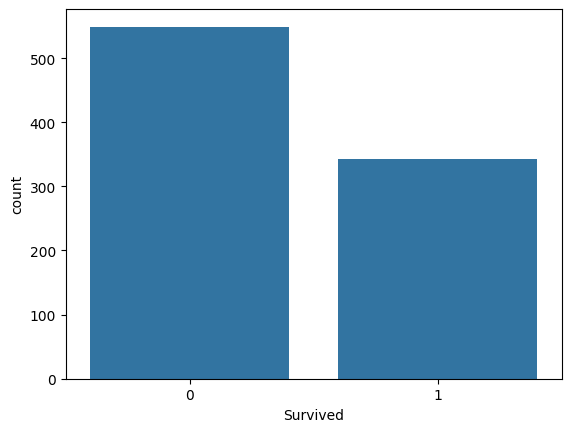

In [52]:
# let's plot this how many survived and how many not survived where x lable is survived
sns.countplot(x='Survived',data=df)

In [53]:
#How Many Passengers Were In First Class, Second Class, and Third Class?
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [54]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

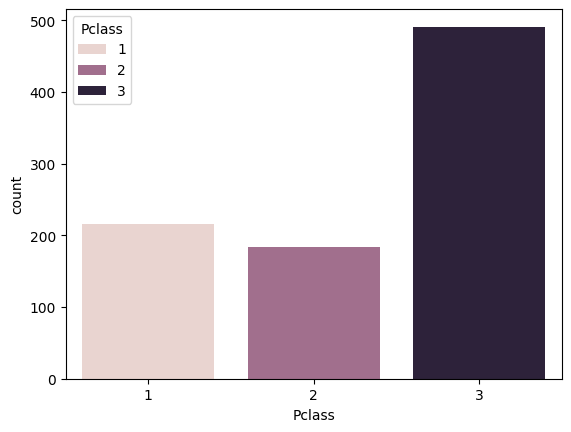

In [57]:
sns.countplot(x='Pclass',data=df,hue='Pclass')

In [58]:
# Number of Male And Female Passengers
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

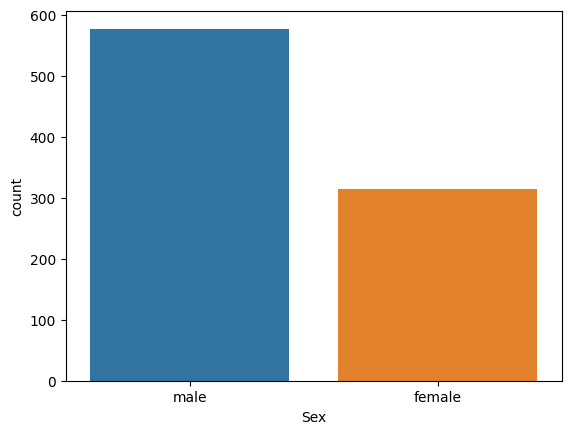

In [60]:
sns.countplot(x='Sex',data=df,hue='Sex') # countplot suitable for descrete or categorical varible

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

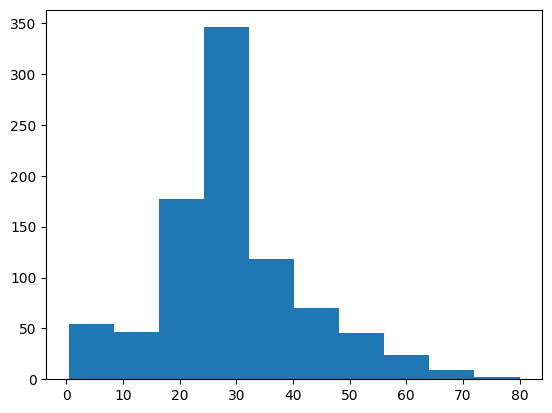

In [61]:
# Histogram and Boxplot used for countinous variable to show  the frequency of varible or say numerical value
plt.hist(df['Age'])

<Axes: ylabel='Age'>

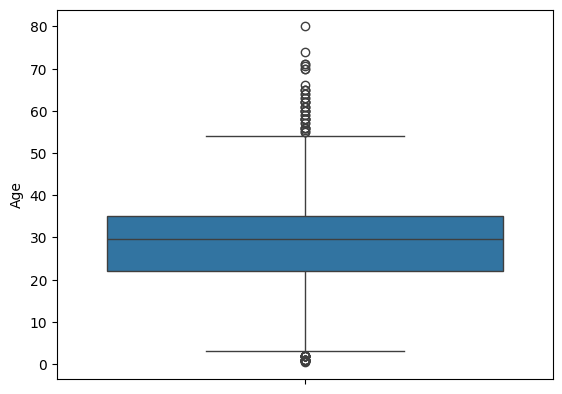

In [66]:
# use boxplot
sns.boxplot(df['Age'],orient='v')

### **Bivariate Analysis**

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='Survived'>

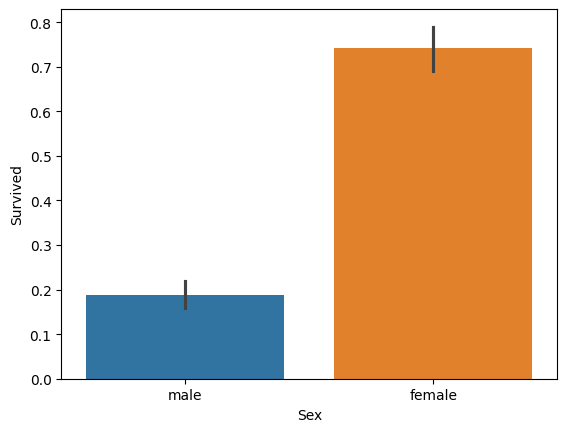

In [69]:
#How Has Better Chance of Survival Male or Female?
# Barplot used for comparing categorical data
sns.barplot(x='Sex',y='Survived',data=df,hue='Sex')

<Axes: xlabel='Pclass', ylabel='Survived'>

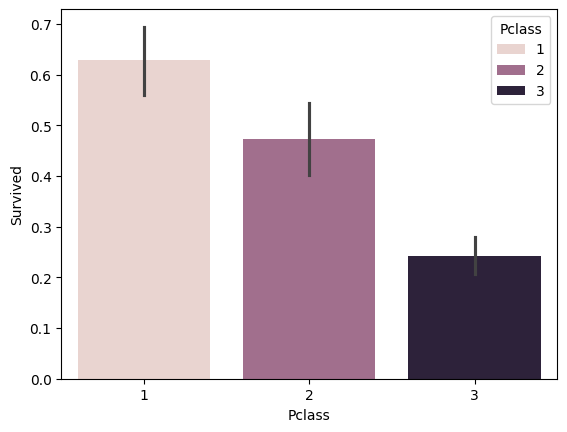

In [72]:
#Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)?
sns.barplot(x='Pclass',y='Survived',data=df,hue='Pclass')

### **Feature Engineering**

It is process of using Domain knowledge to extract features from row data via Data Mining Techniques.This features can be used to improve performance of machine learning algorithms.

In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Gender_new', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [74]:
# Here we want to get Family size of person so we can find Fare per person
#sibsp=siblings or spouse parch=parent and childrens
df['FamilySize']=df['SibSp']+df['Parch']
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.0,1,0,A/5 21171,7.25,S,0,1


In [75]:
#let's find Fare per person
df['Fare_per_person']=df['Fare']/(df['FamilySize']+1)

In [76]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender_new,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,FamilySize,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,0,22.0,1,0,A/5 21171,7.25,S,0,1,3.625


**Conclusion**

